In [49]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split  # Para separar en Train / Test
from sklearn.preprocessing import RobustScaler  # Para escalar
from sklearn import linear_model  # Regresión lineal
from sklearn.ensemble import RandomForestRegressor  # Regresión en Random Forest
from sklearn.metrics import mean_squared_error, r2_score  # Para MSE y R^2
from sklearn.model_selection import GridSearchCV  # Para buscar parámetros optimizados

# from sklearn.metrics import accuracy_score


import matplotlib.pyplot as plt
     
#import seaborn as sns
#import matplotlib.pyplot as plt


Mostramos la información sobre el dataset:

In [2]:
info = open(r'housing data description.txt', 'r')
print(info.read())

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

Creamos y añadimos las columnas de título para crear un dataframe de pandas a partir del .csv:

In [3]:
col_title = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

In [4]:
pisos_Boston = pd.read_csv(r'housing data.csv', names = col_title)

In [5]:
pisos_Boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [6]:
pisos_Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
pisos_Boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
pisos_Boston.duplicated().sum()

0

In [9]:
pisos_Boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

Todo son números, ya sean integers of floats. Como no hay "missing data", ni duplicados, simplemente haremos las operaciones necesarias de transformación de los datos (algún tipo de estandarización/normalización, etc.), porque lo que sí tienen son rangos de valores bastante diferentes.

Observamos también el tipo de distribución, y la presencia o ausencia de outliers:

CRIM


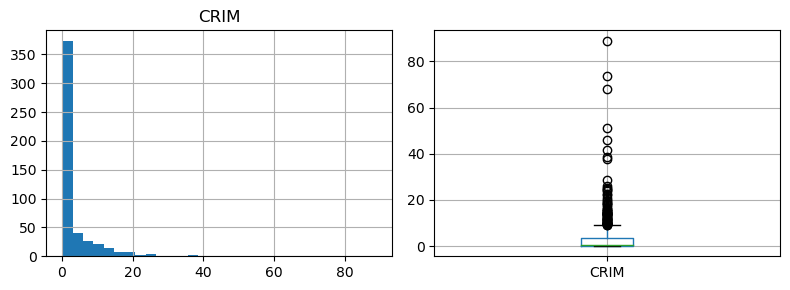

ZN


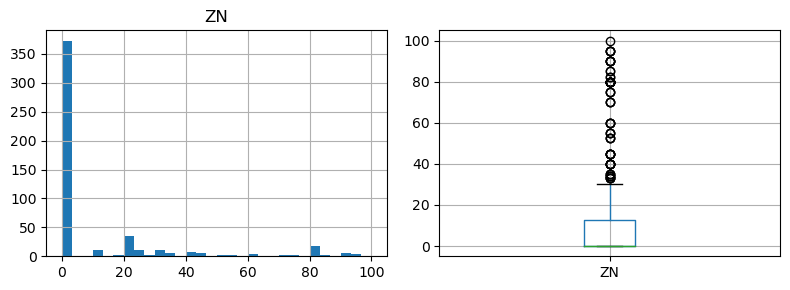

INDUS


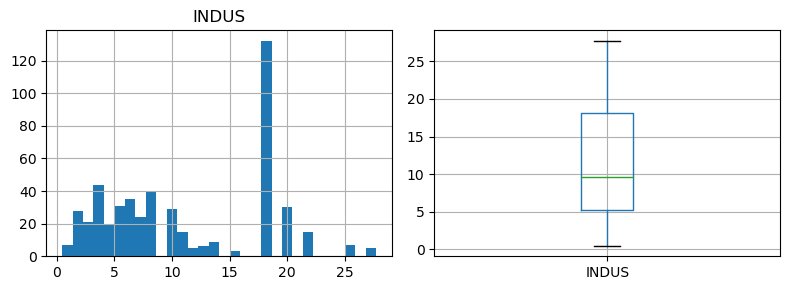

CHAS


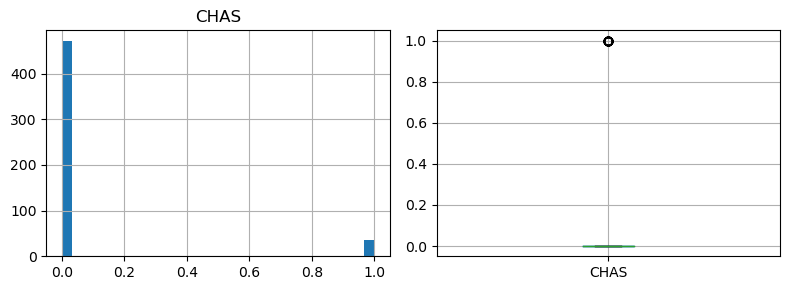

NOX


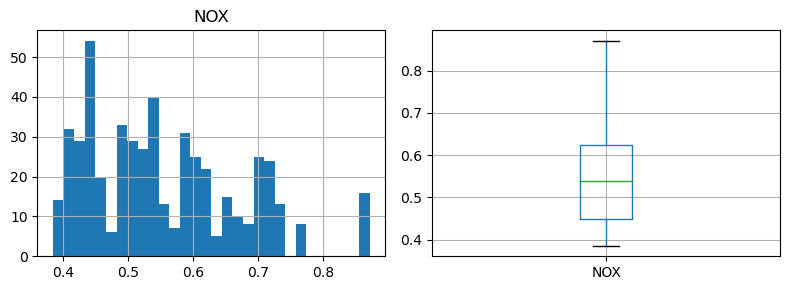

RM


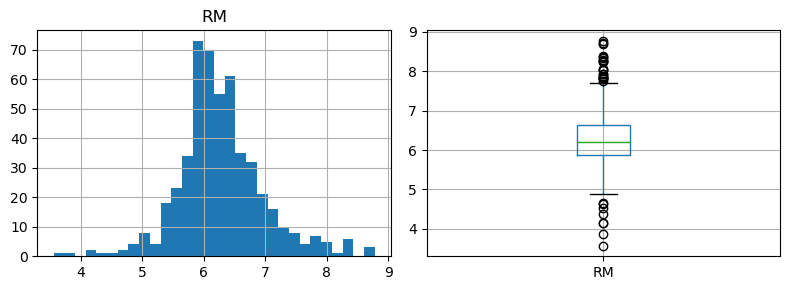

AGE


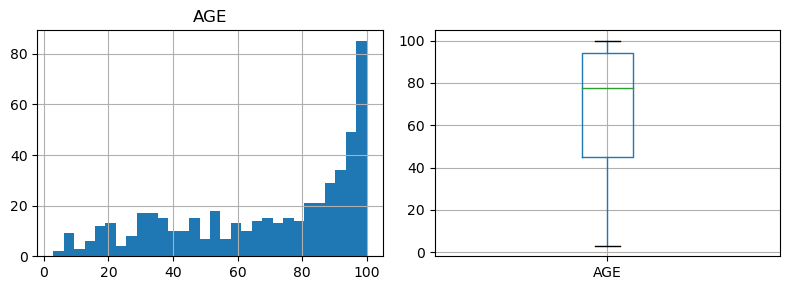

DIS


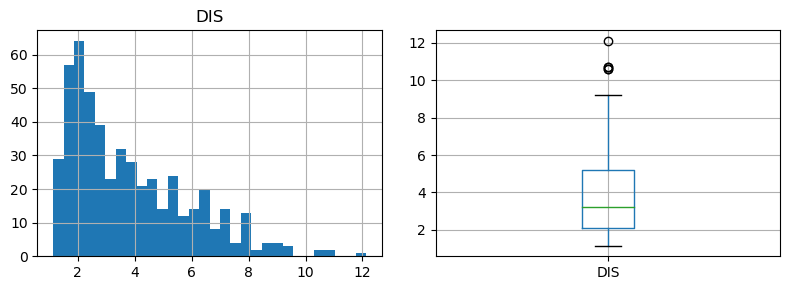

RAD


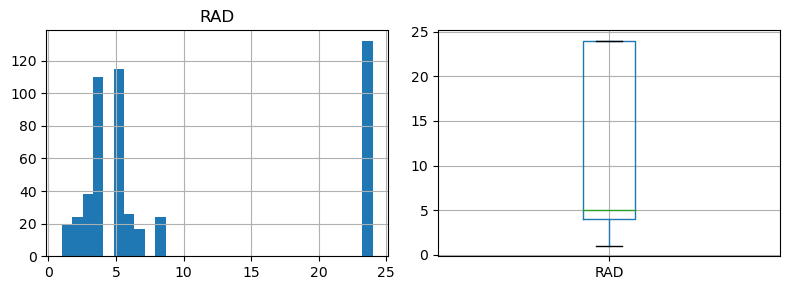

TAX


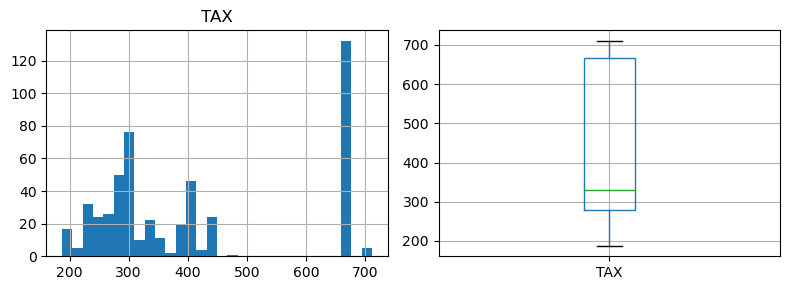

PTRATIO


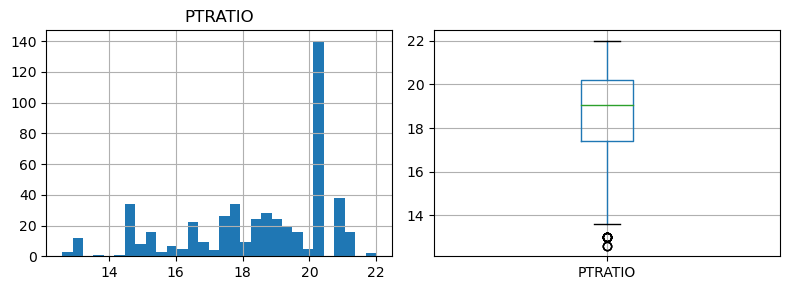

B


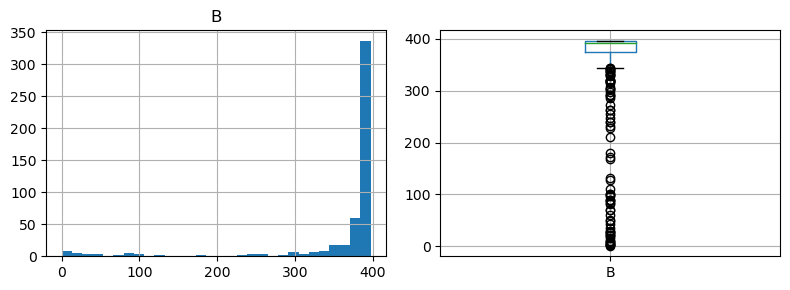

LSTAT


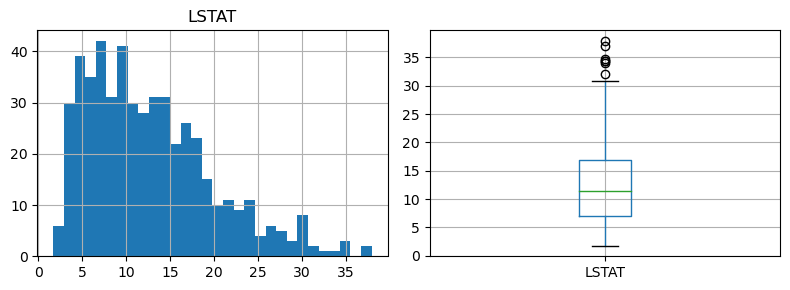

MEDV


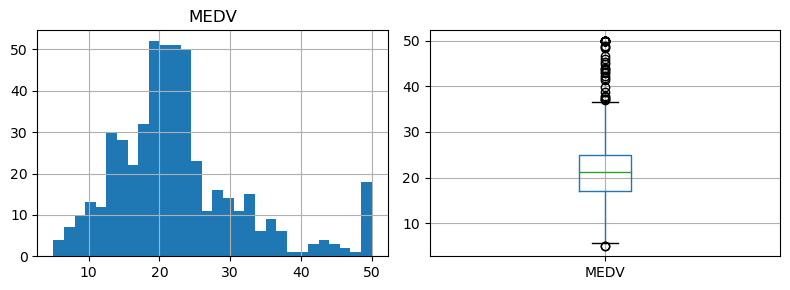

In [11]:
for col in pisos_Boston.columns:
    print(col)

    # Create a figure and a set of subplots
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

    # Plot a histogram on the first subplot
    pisos_Boston.hist(column=col, bins=30, ax=axs[0])

    # Plot a boxplot on the second subplot
    pisos_Boston.boxplot(column=col, ax=axs[1])

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

De lo anterior vemos que la mayoría de las distribuciones ni se acerca a lo que es una distribución normal, y que a lo sumo dos o tres de ellas "parece que lo intentan" (pero con sesgo hacia un lado), solo "RM" parece que pudiera ser normal o parecida a normal.

Además, en los boxplot vemos que bastantes de ellas tienen outliers, y algunas, no solo algunos, sino muchos outliers. Por lo tanto, lo que nos conviene es usar RobustScaler, que aplicamos a continuación.

In [12]:
scaler = RobustScaler()

In [13]:
np_pisos_Boston_escalado = scaler.fit_transform(pisos_Boston)

Como output obtenemos un array de numpy con los valores escalados mediante RobustScaler, que es un procedimiento "resistente a outliers":

In [14]:
np_pisos_Boston_escalado

array([[-0.06959315,  1.44      , -0.57164988, ...,  0.26190191,
        -0.63768116,  0.35109718],
       [-0.06375455,  0.        , -0.20294345, ...,  0.26190191,
        -0.22188906,  0.05015674],
       [-0.06376011,  0.        , -0.20294345, ...,  0.06667466,
        -0.73263368,  1.69278997],
       ...,
       [-0.05445006,  0.        ,  0.17350891, ...,  0.26190191,
        -0.57171414,  0.33855799],
       [-0.04086745,  0.        ,  0.17350891, ...,  0.09641444,
        -0.48775612,  0.10031348],
       [-0.05816351,  0.        ,  0.17350891, ...,  0.26190191,
        -0.34782609, -1.1661442 ]])

Hay que volver a convertir estos datos en un dataframe de Pandas:

In [15]:
pisos_Boston_escalado = pd.DataFrame(np_pisos_Boston_escalado, columns=pisos_Boston.columns)

In [16]:
pisos_Boston_escalado

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681,0.351097
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889,0.050157
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634,1.692790
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579,1.529781
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699,1.880878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916,0.150470
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886,-0.075235
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714,0.338558
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756,0.100313


# Ejercicio 1

Crear como mínimo dos modelos de regresión diferentes para predecir lo mejor posible el precio de las viviendas (MEDV).

Consideraciones:
    
-Eliminaremos la columna objetivo, o sea, la columna del precio mediano, "MEDV" para conformar el grupo de datos "X".

-Emplearemos la columna objetivo eliminada, "MEDV" (que es la variable "target"), como grupo de datos "Y" para entrenar los modelos.

-Separaremos los datos en un grupo de entrenamiento ("train") y un grupo para testing ("test").

Variables "predictoras", X:

In [17]:
X = pisos_Boston_escalado.drop(['MEDV'], axis=1)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.069593,1.44,-0.571650,0.0,0.000000,0.496612,-0.250765,0.285777,-0.20,-0.087855,-1.339286,0.261902,-0.637681
1,-0.063755,0.00,-0.202943,0.0,-0.394286,0.287940,0.028542,0.569789,-0.15,-0.227390,-0.446429,0.261902,-0.221889
2,-0.063760,0.00,-0.202943,0.0,-0.394286,1.323171,-0.334353,0.569789,-0.15,-0.227390,-0.446429,0.066675,-0.732634
3,-0.062347,0.00,-0.581720,0.0,-0.457143,1.069783,-0.646279,0.924391,-0.10,-0.279070,-0.125000,0.153016,-0.841579
4,-0.052144,0.00,-0.581720,0.0,-0.457143,1.271680,-0.475025,0.924391,-0.10,-0.279070,-0.125000,0.261902,-0.602699
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.053930,0.00,0.173509,0.0,0.200000,0.521003,-0.171254,-0.236007,-0.20,-0.147287,0.696429,0.026382,-0.168916
502,-0.058759,0.00,0.173509,0.0,0.200000,-0.119919,-0.016310,-0.297887,-0.20,-0.147287,0.696429,0.261902,-0.227886
503,-0.054450,0.00,0.173509,0.0,0.200000,1.039973,0.275229,-0.336744,-0.20,-0.147287,0.696429,0.261902,-0.571714
504,-0.040867,0.00,0.173509,0.0,0.200000,0.793360,0.240571,-0.265053,-0.20,-0.147287,0.696429,0.096414,-0.487756


Variable "target", Y:

In [18]:
Y = pisos_Boston_escalado["MEDV"]
Y

0      0.351097
1      0.050157
2      1.692790
3      1.529781
4      1.880878
         ...   
501    0.150470
502   -0.075235
503    0.338558
504    0.100313
505   -1.166144
Name: MEDV, Length: 506, dtype: float64

Dividimos los datos en datos para entrenamiento ("train") y datos para testing ("test"):

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

Vemos las dimensiones/forma de los cuatro "sets" obtenidos X e Y tanto de entrenamiento como de test:

In [20]:
X_train.shape

(404, 13)

In [21]:
X_test.shape

(102, 13)

In [22]:
Y_train.shape

(404,)

In [23]:
Y_test.shape

(102,)

Definimos el primer modelo, una regresión lineal, y la entrenamos:

In [24]:
regresion_lineal= linear_model.LinearRegression()
regresion_lineal.fit(X_train, Y_train)

LinearRegression()

In [25]:
Y_pred_lineal = regresion_lineal.predict(X_test)

Estas son sus predicciones:

In [26]:
Y_pred_lineal

array([ 1.36200651,  0.60497318, -0.77192417,  0.48547187, -0.72637403,
        1.38995986, -0.2853882 , -0.59101972,  0.27835797, -0.44677496,
        1.51027638, -0.74730254,  1.4065155 , -0.15245793, -0.05307014,
       -0.87941615,  1.7073422 ,  1.02500261,  1.81772548, -1.0571047 ,
       -0.23862538,  1.02207447, -1.48159367,  0.46186316,  0.45204376,
        0.7712114 ,  2.34986227, -0.30186802,  0.69079817, -1.88850841,
        1.03764358,  1.18453775,  1.03653781,  1.59836367, -0.92990327,
       -1.04071662,  0.02117053,  1.30505972, -0.57593803,  1.84491385,
       -0.74418599, -0.81237293,  0.83009056,  0.92424354, -0.00342271,
        0.78526296, -0.90298277,  1.29481834,  0.99368492,  0.90641884,
        0.79500466,  0.11695737, -0.23040573,  0.46405927,  0.83712473,
       -0.22325623,  0.48650698, -0.7150449 ,  0.03241062, -1.43896617,
       -0.7026736 , -0.46592142, -0.87123587,  0.83370973,  0.45420019,
        1.42468513, -0.26887716,  1.08740047,  1.80822824, -0.97

Definimos un segundo modelo, un regresor Random Forest, y lo entrenamos:

In [27]:
regresion_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regresion_rf.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
Usamos la regresión random forest creada para predecir Y a partir de valores test de X.

In [28]:
Y_pred_rf = regresion_rf.predict(X_test)

In [29]:
Y_pred_rf

array([ 1.20940439e+00,  1.06068966e-01, -5.99235110e-01,  2.38231975e-01,
       -5.24614420e-01,  1.33305329e+00, -8.19648903e-01, -1.44200627e-01,
       -1.07924765e-01, -7.58357367e-01,  1.74473981e+00, -1.04984326e+00,
        4.64840125e-01,  6.05391850e-02, -3.12376176e-01, -9.21216301e-01,
        2.46473981e+00,  3.17655172e-01,  3.01430721e+00, -1.25087147e+00,
       -2.51598746e-01,  4.28677116e-01, -2.89153605e-01,  1.54119122e-01,
        7.95235110e-02,  2.81429467e-01,  3.21444514e+00, -6.66332288e-02,
        8.18633229e-01, -1.58322257e+00,  3.83235110e-01,  1.03909718e+00,
        6.09442006e-01,  1.68805016e+00, -6.96263323e-01, -1.27118495e+00,
       -1.69141066e-01,  1.19342947e+00, -7.73266458e-01,  1.25610031e+00,
       -5.37391850e-01, -7.61617555e-01,  4.13354232e-01,  1.13361755e+00,
       -1.62181818e-01,  2.19448276e-01, -1.24223197e+00,  6.93404389e-01,
        3.01918495e-01,  7.25868339e-01,  2.14407524e-01,  1.22633229e-02,
       -4.27586207e-02,  

# Ejercicio 2

Comparar los modelos en base a MSE y R2.

A continuación cuán mejor o peor es cada regresión (lineal y random forest) en base a su ajuste y acierto prediciendo los valores, así como su error cuadrático medio (MSE).

Observamos los valores para la regresión lineal:

In [34]:
print(X_train.columns)
print('Coefficients:', regresion_lineal.coef_)
print('Intercept:', regresion_lineal.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_lineal))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_lineal))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Coefficients: [-0.05480738  0.07448212  0.03333027  0.23805131 -0.38923161  0.34737467
 -0.0213119  -0.58924701  0.7925309  -0.64141974 -0.37437666  0.01657131
 -0.64204889]
Intercept: 0.23069570934912725
Mean squared error (MSE): 0.39
Coefficient of determination (R^2): 0.66


Y aquí, los valores de la regresión mediante "random forest":

In [35]:
print(X_train.columns)
print('Feature Importances:', regresion_rf.feature_importances_)  # Nos da la importancia relativa de cada "feature" en la predicción.
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_rf))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_rf))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Feature Importances: [0.03944808 0.00221371 0.00716355 0.00083084 0.02819969 0.43023422
 0.01824732 0.02814987 0.00394504 0.0162927  0.01896899 0.01000813
 0.39629787]
Mean squared error (MSE): 0.27
Coefficient of determination (R^2): 0.76


En este caso, claramente el modelo de "Random Forest Regressor" es mucho mejor que el de la regresión lineal ya que tanto el  coeficiente de determinación erre al cuadrado es mayor (mejor ajuste) y el error cuadrático medio es menor.

# Ejercicio 3

Entrenar los modelos empleando los diferentes parámetros de los que disponen, para tratar de mejorarlos.

Los siguientes son los parámetros por defecto usados hace un momento en la regresión lineal:

In [38]:
print('Parameters currently in use:\n')
print(regresion_lineal.get_params())

Parameters currently in use:

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


Y estos, son los parámetros por defecto utilizados en la regresión random forest de antes:

In [37]:
print('Parameters currently in use:\n')
print(regresion_rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 1000, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


Por sus características, en el caso de la regresión lineal no tenemos gran margen de maniobra para modificar cosas.

En cambio, la regresión "random forest" nos ofrece un abanico de hiperparámetros que se pueden modificar en busca de un mejor modelo. Seleccionaremos en su caso una serie de parámetros que "tunear". Se buscará por prueba y error los óptimos, dentro de las opciones que indiquemos.

Podríamos modificar, por ejemplo, unos cuantos de los siguientes hiperparámetros:

-n_estimators, que representa el número de "árboles" en el "bosque" del random forest.

-max_features, que representa el número de variables o rasgos considerados para partir un nodo en dos.

-max_depth, que representa el número de niveles en cada árbol de decisión.

-min_samples_split, que representa el número de datos o "data points" en cada nodo antes de que éste sea partido en dos fragmentos o "ramas".

-min_samples_leaf, el número mínimo de datos o "data points" que debe haber en un "nodo hoja" (i.e. un nodo terminal).

-bootstrap, el método para muestrear los datos o "data points" (ya sea con o sin substitución).

In [42]:
# Hiperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [10, 20, 30],   # en este caso, realmente no tienen sentido los valores "20" y "30", no hay tantos features.
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4],
    'bootstrap': [True, False]
}

# Búsqueda dentro de los hiperparámetros decididos
grid_search = GridSearchCV(estimator=regresion_rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, Y_train)

# ¿Cuáles son los mejores hiperparámetros?
print("Best parameters:", grid_search.best_params_)

# Nota: he quitado un trozo de código que daba error aquí (véase debajo).
# No obstante, no he vuelto a correr la celda para "limpiar" porque mi ordenador casi muere en el intento por sobrecalentamiento.

Fitting 5 folds for each of 1296 candidates, totalling 6480 fits
Best parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


NameError: name 'accuracy_score' is not defined

In [51]:
# Podemos ver aquí los "scores" de cada una de las combinaciones
print("\nAll Results:")
for mean_score, params in zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']):
    print(f"Mean Test Score: {mean_score:.3f} for Parameters: {params}")


All Results:
Mean Test Score: 0.856 for Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Mean Test Score: 0.855 for Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Mean Test Score: 0.854 for Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Mean Test Score: 0.854 for Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Test Score: 0.852 for Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Test Score: 0.853 for Parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Mean 

El siguiente es el mejor modelo:

In [52]:
best_model = grid_search.best_estimator_
#Y_pred = best_model.predict(X_test)

In [44]:
best_model

RandomForestRegressor(bootstrap=False, max_depth=20, max_features=10,
                      min_samples_split=5, n_estimators=300, random_state=42)

De lo anterior vemos que el mejor modelo es:

RandomForestRegressor(bootstrap=False, max_depth=20, max_features=10, min_samples_split=5, n_estimators=300, random_state=42)

Por lo tanto, para la regresión random forest aplicaremos esos mismos parámetros.

In [47]:
regresion_rf_optimizada = RandomForestRegressor(bootstrap=False, max_depth=20, max_features=10,
                      min_samples_split=5, n_estimators=300, random_state=42)
regresion_rf_optimizada.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features=10,
                      min_samples_split=5, n_estimators=300, random_state=42)

Vuelvo a calcular MSE y R^2... me llama la atención que salen los mismos valores...? ¿Es posible esto a pesar de la optimización o es que tampoco hay mucha diferencia a pesar de todo?

In [48]:
print(X_train.columns)
print('Feature Importances:', regresion_rf_optimizada.feature_importances_)  # Nos da la importancia relativa o "peso" de cada "feature" en la predicción.
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_rf))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_rf))

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')
Feature Importances: [7.41027292e-02 2.25215013e-03 1.99266213e-02 3.02361434e-04
 3.57343297e-02 5.27855858e-01 1.36984238e-02 2.73123470e-02
 3.26301522e-03 1.19491354e-02 1.48808414e-02 7.45616729e-03
 2.61266020e-01]
Mean squared error (MSE): 0.27
Coefficient of determination (R^2): 0.76


# Ejercicio 4

Comparar su rendimiento empleando la aproximación train/test o empleando todos los datos (validación interna).

Ya se ha hecho una comparación mediante la aproximación train/test (ejercicio 2).

Hagámoslo ahora mediante todos los datos, como la alternativa que nos piden.

In [74]:
# Usamos como predictor el dataframe escalado completo al que se le quita la columna "MEDV"
Y_pred_lineal_todos = regresion_lineal.predict(pisos_Boston_escalado.drop(['MEDV'], axis=1))

In [75]:
Y_pred_lineal_todos  # Predicción usando un modelo basado en todos los datos (probable overfitting).

array([ 1.14517849,  0.48547187,  1.17750681,  0.92276838,  0.83712473,
        0.50376806,  0.27835797, -0.16462671, -1.14704114, -0.23862538,
       -0.2310788 ,  0.08943409,  0.03874182, -0.23949143, -0.27518896,
       -0.2659177 , -0.09874629, -0.56482448, -0.59529971, -0.37350599,
       -1.10459149, -0.47552409, -0.7026736 , -0.95630723, -0.72637403,
       -0.97331047, -0.74791185, -0.81237293, -0.24907043, -0.07757954,
       -1.23114685, -0.43042176, -1.50121603, -0.88082354, -0.91303178,
        0.33256323,  0.16195632,  0.25374833,  0.23835959,  1.30131961,
        1.65592129,  0.89169028,  0.54311   ,  0.46686404,  0.24659386,
        0.14839363, -0.05553569, -0.37808291, -1.48159367, -0.47502675,
        0.05266906,  0.37410066,  0.84719227,  0.40350761, -0.77134507,
        1.26568141,  0.46797642,  1.54419467,  0.06688494, -0.02083073,
       -0.42694123, -0.35187594,  0.32290069,  0.15434789,  0.25352503,
        1.19747285,  0.5973696 , -0.00469455, -0.46592142, -0.05

In [58]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(pisos_Boston_escalado['MEDV'], Y_pred_lineal_todos))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(pisos_Boston_escalado['MEDV'], Y_pred_lineal_todos))

Mean squared error (MSE): 0.35
Coefficient of determination (R^2): 0.74


Comprobemos ahora qué pasa con el regresor "Random Forest" (pero el optimizado).

In [59]:
# Usamos como predictor el dataframe escalado completo al que se le quita la columna "MEDV"
Y_pred_rf_opt_todos = regresion_rf_optimizada.predict(pisos_Boston_escalado.drop(['MEDV'], axis=1))

In [60]:
Y_pred_rf_opt_todos

array([ 8.11173807e-01,  2.89536747e-01,  1.68194009e+00,  1.54476141e+00,
        1.56738767e+00,  9.54231975e-01, -1.19728318e-01,  6.88286311e-01,
       -6.33594566e-01, -4.67147335e-01, -6.69031696e-01, -3.05788924e-01,
        1.00693138e-01, -1.20470219e-01, -4.20292581e-01, -1.46544758e-01,
        1.03099965e-02, -4.20909091e-01, -1.68540578e-01, -3.39268548e-01,
       -9.55001742e-01, -2.00299547e-01, -6.38867990e-01, -8.53577151e-01,
       -5.04845002e-01, -9.09268548e-01, -5.43486590e-01, -8.00741902e-01,
       -3.34179728e-01, -4.07279693e-02, -1.03029955e+00, -8.01992337e-01,
       -9.75761059e-01, -9.97140369e-01, -9.66722396e-01, -2.36154650e-01,
       -1.41163358e-01, -1.72413793e-02,  3.84764890e-01,  1.10588297e+00,
        1.73617555e+00,  7.02459073e-01,  5.10149774e-01,  4.70539882e-01,
       -1.26819923e-02, -2.28533612e-01, -1.48338558e-01, -5.60417973e-01,
        3.45419714e-02, -2.63399512e-01, -1.82466040e-01, -8.85510275e-02,
        5.29188436e-01,  

In [61]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(pisos_Boston_escalado['MEDV'], Y_pred_rf_opt_todos))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(pisos_Boston_escalado['MEDV'], Y_pred_rf_opt_todos))

Mean squared error (MSE): 0.07
Coefficient of determination (R^2): 0.95


De la comprobación anterior, podemos ver que, tomando el conjunto de los datos, el modelo en random forest optimizado se comporta mucho, mucho mejor que el de regresión lineal.

Tenemos un MSE de solamente 0,07 (frente a 0,35 del lineal) y R^2 de 0,95 (frente a 0,74 del lineal)

# Ejercicio 5

Hacer predicciones de valor mediano (MEDV), pero sin usar la variable número de habitaciones (RM).

Recreemos ambos modelos, el lineal, y el "random forest" (optimizado).

Primero, con el lineal (eliminando la variable "RM" y la variable target "MEDV"):

In [65]:
regresion_lineal_no_room = linear_model.LinearRegression()
regresion_lineal_no_room.fit(X_train.drop(['RM', 'MEDV'], axis=1), Y_train)

LinearRegression()

In [77]:
regresion_lineal_no_room.predict(pisos_Boston_escalado.drop(['RM', 'MEDV'], axis=1))

array([ 1.32923315e+00,  5.35634739e-01,  9.81200519e-01,  7.92579957e-01,
        5.84022663e-01,  6.07694304e-01,  4.53882335e-01, -2.02566988e-01,
       -1.27551877e+00, -1.76514155e-01, -4.23724235e-01,  2.72979927e-01,
        7.82748832e-02, -1.06561198e-01, -1.91621539e-01, -9.69563794e-02,
        2.17137962e-04, -5.83530963e-01, -3.64491210e-01, -1.84501615e-01,
       -1.06686118e+00, -4.25469029e-01, -8.90439882e-01, -1.00327819e+00,
       -7.34256957e-01, -8.32937584e-01, -6.68195567e-01, -8.99266045e-01,
       -4.07869655e-01, -3.07886946e-01, -1.33245469e+00, -3.68140862e-01,
       -1.87280219e+00, -8.19900629e-01, -1.05924638e+00,  5.82073544e-01,
        3.81374601e-01,  4.70175831e-01,  3.21900583e-01,  1.44139279e+00,
        1.65224090e+00,  6.76758759e-01,  5.91601175e-01,  4.37382916e-01,
        3.24525868e-01,  3.80719340e-01, -4.56340392e-03, -4.41150911e-01,
       -1.62075786e+00, -3.38955621e-01,  1.38990926e-01,  5.79074472e-01,
        8.66319037e-01,  

Y ahora, reentrenamos el modelo random forest, con los hiperparámetros optimizados:

In [66]:
regresion_rf_optimizada_no_room = RandomForestRegressor(bootstrap=False, max_depth=20, max_features=10,
                      min_samples_split=5, n_estimators=300, random_state=42)
regresion_rf_optimizada_no_room.fit(X_train.drop(['RM'], axis=1), Y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features=10,
                      min_samples_split=5, n_estimators=300, random_state=42)

Y ya podemos proceder a hacer las predicciones sin usar "RM" también en este modelo, como se nos pide.

In [79]:
regresion_rf_optimizada_no_room.predict(pisos_Boston_escalado.drop(['RM', 'MEDV'], axis=1))

array([ 1.38029606e+00, -1.53131313e-01,  1.63152212e+00,  1.54292233e+00,
        1.40476489e+00,  1.08426681e+00, -1.54346917e-01,  7.21118077e-01,
       -6.31504702e-01, -3.78453501e-01, -6.34959944e-01, -2.64559387e-01,
        6.86729363e-02, -1.30181122e-01, -3.66516893e-01, -1.16663184e-01,
       -1.47753396e-02, -4.76969697e-01, -1.34761407e-01, -3.53859282e-01,
       -9.63235806e-01, -2.04381749e-01, -6.63667712e-01, -8.66151167e-01,
       -6.28495298e-01, -8.96436782e-01, -5.67049808e-01, -8.91226054e-01,
       -3.45869035e-01, -1.12528736e-01, -1.03866945e+00, -7.78697318e-01,
       -9.63368164e-01, -1.00776036e+00, -9.63991641e-01, -2.42121212e-01,
       -1.51570881e-01, -4.73702543e-02,  3.98784396e-01,  1.29722048e+00,
        1.68461163e+00,  8.00069662e-01,  4.78164403e-01,  4.60257750e-01,
       -5.42319749e-03, -2.16952281e-01, -1.49362591e-01, -5.88307210e-01,
       -1.52107280e-01, -1.62904911e-01, -1.73476141e-01, -4.85440613e-02,
        4.40773250e-01,  